In [18]:
import cv2,os
import numpy as np
from PIL import Image
import pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from cv2.face import *
recognizer = cv2.face.LBPHFaceRecognizer_create()
cascadePath = "Classifiers/face.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);
path = 'labledImages'

def get_images_and_labels(path):
     image_folder_paths = os.listdir(path)
     # images will contains face images
     images = []
     # labels will contains the label that is assigned to the image
     labels = []
     for image_folder_path in image_folder_paths:
         print(image_folder_path)
         if(os.path.isdir(os.path.join(path, image_folder_path))):
             image_paths = os.listdir(os.path.join(path, image_folder_path))
             for image_path in image_paths:

                 selected_image_path = os.path.join(path, image_folder_path, image_path)
                 #print(selected_image_path)
                 if(image_path[len(image_path)-5:len(image_path)] == ".jpeg"):
                     # Read the image and convert to grayscale
                     image_pil = Image.open(selected_image_path).convert('L')
                     # Convert the image format into numpy array
                     image = np.array(image_pil, 'uint8')
                     # Get the label of the image
                     #nbr = int(os.path.split(image_path)[1].split(".")[0].replace("face-", ""))
                     #nbr=int(''.join(str(ord(c)) for c in nbr))
                     nbr = int(image_folder_path)
                     #print nbr
                     # Detect the face in the image
                     faces = faceCascade.detectMultiScale(image)
                     # If face is detected, append the face to images and the label to labels
                     for (x, y, w, h) in faces:
                         images.append(image[y: y + h, x: x + w])
                         labels.append(nbr)
                         #cv2.imshow("Adding faces to traning set...", image[y: y + h, x: x + w])
                         cv2.waitKey(10)
     # return the images list and labels list
     return images, labels


images, labels = get_images_and_labels(path)
#cv2.imshow('test',images[0])
cv2.waitKey(1)

recognizer.train(images, np.array(labels))
recognizer.write('trainer/trainer.yml')
cv2.destroyAllWindows()



2
3
.DS_Store
1
4


juliaRoberts1.jpeg--Julia Roberts
jimCarrey7.jpeg--Jim Carrey
quentinTarantino2.jpeg--Quienten Tarantino
jimCarrey2.jpeg--Jim Carrey
hughGrant5.jpeg--Hugh Grant
jimCarrey3.jpeg--Jim Carrey
quentinTarantino1.jpeg--Quienten Tarantino
quentinTarantino4.jpeg--Quienten Tarantino
jimCarrey4.jpeg--Jim Carrey
hughGrant1.jpeg--Quienten Tarantino


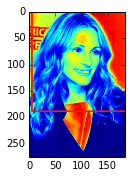

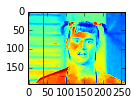

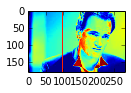

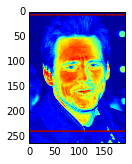

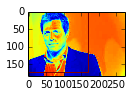

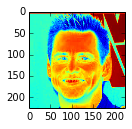

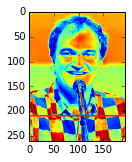

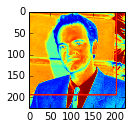

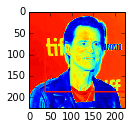

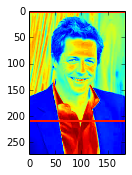

In [19]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('trainer/trainer.yml')
cascadePath = "Classifiers/face.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);
path = 'testDataSetUnlabeledImages'

font = cv2.FONT_HERSHEY_SIMPLEX
image_paths = os.listdir(path)
def labelNumberToName(labelNumber):
    label = "none"
    if labelNumber == 1:
        label = "Jim Carrey"
    elif labelNumber == 2:
        label = "Julia Roberts"
    elif labelNumber == 3:
        label = "Hugh Grant"
    elif labelNumber == 4:
        label = "Quienten Tarantino"
    else:
        label = "none"
    return label

for image_path in image_paths:
    #print(image_path)
    image_full_path = os.path.join(path,image_path)
    image_pil = Image.open(image_full_path).convert('L')
    im = np.array(image_pil, 'uint8')
    #gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(im, scaleFactor=1.2, minNeighbors=5, minSize=(100, 100), flags=cv2.CASCADE_SCALE_IMAGE)
    for(x,y,w,h) in faces:
        nbr_predicted, conf = recognizer.predict(im[y:y+h,x:x+w])
        cv2.rectangle(im,(x-50,y-50),(x+w+50,y+h+50),(225,0,0),2)

        #cv2.cv.PutText(cv2.cv.fromarray(im),str(nbr_predicted)+"--"+str(conf), (x,y+h),font, 255) #Draw the text
        print(image_path + "--" + str(labelNumberToName(nbr_predicted)))
        fig = plt.figure(figsize=(10, 30))
        plt.subplot(1, 5, 1)
        plt.imshow(im)
        #cv2.waitKey(10)
